<a href="https://colab.research.google.com/github/Karina073/proyecto_integrado2-/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Física', 'Química', 'Biología', 'Filosofía', 'Ciudadanía y Participación']

# Función para generar un nombre aleatorio
def generar_nombre():
  nombres = ['Juan', 'Pedro', 'Maria', 'Ana', 'Sofia', 'Lucas', 'Mateo', 'Martina', 'Emma', 'Benjamín']
  apellidos = ['Gómez', 'Rodríguez', 'Pérez', 'López', 'García', 'Martínez', 'González', 'Sánchez', 'Romero', 'Fernández']
  return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Crear un DataFrame vacío
df = pd.DataFrame(columns=['Apellido y Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Generar 100 filas de datos aleatorios
for i in range(100):
  nombre = generar_nombre()
  dni = np.random.randint(10000000, 99999999)  # DNI aleatorio de 8 dígitos
  materia = random.choice(materias)
  nota1 = np.random.randint(1, 11)
  nota2 = np.random.randint(1, 11)
  nota3 = np.random.randint(1, 11)
  faltas = np.random.randint(0, 20)

  df.loc[i] = [nombre, dni, materia, nota1, nota2, nota3, faltas]

# Mostrar el DataFrame
df

,Apellido y Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Benjamín García,88430369,Filosofía,2,9,9,13
1,Mateo Rodríguez,56599827,Ciencias Naturales,6,10,3,11
2,Maria Gómez,24100505,Filosofía,5,10,4,14
3,Ana López,52696582,Biología,6,5,7,18
4,Maria Martínez,28035487,Historia,7,10,2,11
...,...,...,...,...,...,...,...
95,Benjamín González,70157123,Ciudadanía y Participación,5,6,4,13
96,Martina Sánchez,46389126,Física,2,1,8,6
97,Pedro Romero,21798503,Historia,7,5,10,0
98,Juan Pérez,54089914,Historia,6,5,6,9


<ipython-input-2-c12dfb9fb8b8>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(promedios_ordenados.index, rotation=45, ha='right') # Rotar etiquetas del eje x


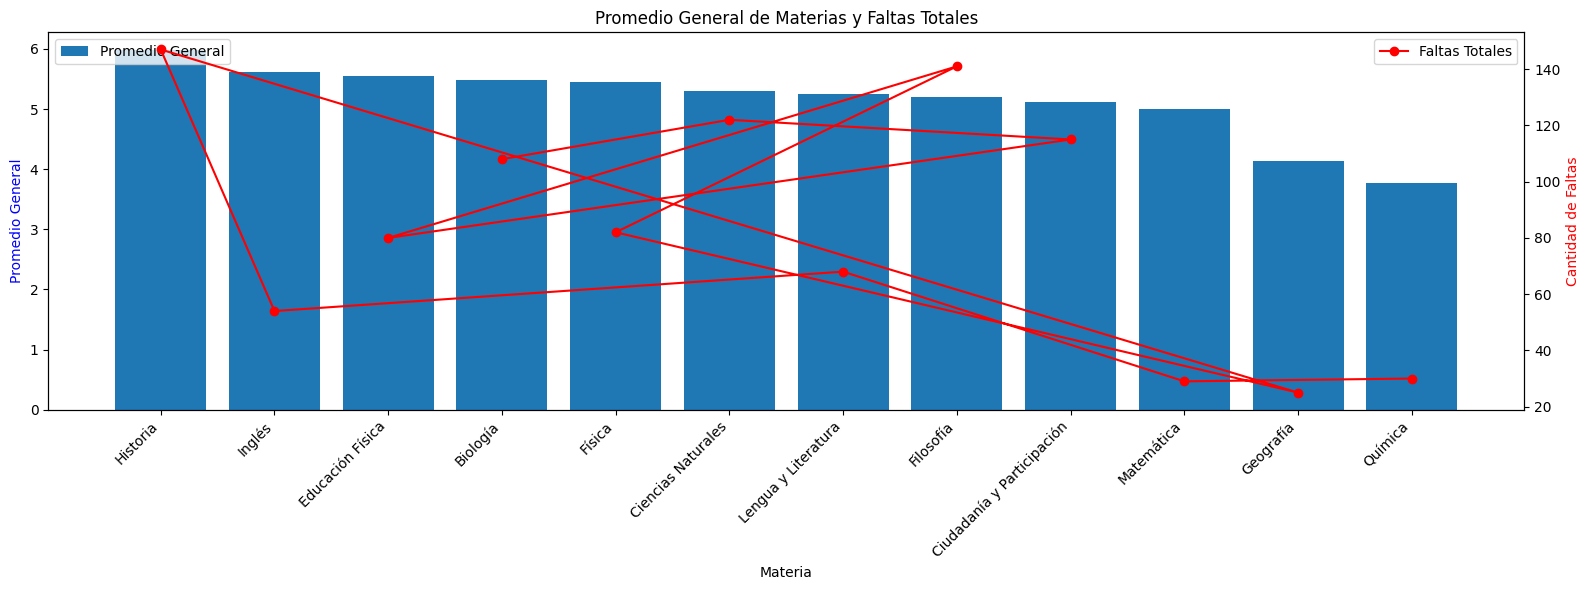

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(111)

# Barras para el promedio de cada materia
ax1.bar(promedios_ordenados.index, promedios_ordenados.values, label='Promedio General')

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o', label='Faltas Totales')

# Configuraciones del gráfico
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='blue')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax1.set_xticklabels(promedios_ordenados.index, rotation=45, ha='right') # Rotar etiquetas del eje x
plt.title('Promedio General de Materias y Faltas Totales')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)